In [33]:
import random
import matplotlib.pyplot as plt
import math

In [34]:
n=64
x=[random.randint(0,256) for i in range(n)]
y=[random.randint(0,256) for i in range(n)]

In [35]:
def distance(i,j):
    return ((x[i]-x[j])**2+(y[i]-y[j])**2)**0.5

def total_distance(v):
    d=0
    for i in range(n-1):
        d+=distance(v[i],v[i+1])
    d+=distance(v[n-1],v[0])
    return d

In [36]:
# ランダム解
v=[i for i in range(n)]
random.shuffle(v)

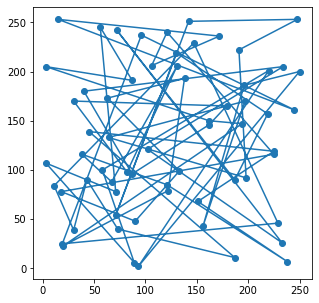

Total distance: 8437.048742355099


In [37]:
fig = plt.figure(figsize=(5,5))
plt.clf()
#plt.title("Random Solution")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total distance:",total_distance(v))

In [38]:
start_temp=300
end_temp=0.001
total_iteration=10000000
for cnt in range(total_iteration):
    temp=start_temp+(end_temp-start_temp)*cnt/total_iteration
    if cnt%10000==0:
        print(f"cnt={cnt} temp={temp} total_distance={total_distance(v)}")
    i=random.randint(0,n-1)
    j=random.randint(0,n-1)
    if abs(i-j)<=1 or abs(i-j)>=n-1:
        continue
    dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(j-1)%n],v[j])+distance(v[j],v[(j+1)%n])
    dist2=distance(v[(i-1)%n],v[j])+distance(v[j],v[(i+1)%n])+distance(v[(j-1)%n],v[i])+distance(v[i],v[(j+1)%n])
    if dist2<dist1:
        v[i],v[j]=v[j],v[i]
    else:
        prob=math.exp((dist1-dist2)/temp)
        if random.random()<prob:
            v[i],v[j]=v[j],v[i]

cnt=0 temp=300.0 total_distance=8437.048742355099
cnt=10000 temp=299.700001 total_distance=8480.76796884454
cnt=20000 temp=299.400002 total_distance=7176.558551118215
cnt=30000 temp=299.100003 total_distance=7157.304207835078
cnt=40000 temp=298.800004 total_distance=8224.166779985673
cnt=50000 temp=298.500005 total_distance=8628.104676763707
cnt=60000 temp=298.200006 total_distance=8684.97009253885
cnt=70000 temp=297.900007 total_distance=7362.64112705341
cnt=80000 temp=297.600008 total_distance=8370.791391052575
cnt=90000 temp=297.300009 total_distance=8026.6023839641875
cnt=100000 temp=297.00001 total_distance=8334.812899082648
cnt=110000 temp=296.700011 total_distance=8966.340760085572
cnt=120000 temp=296.400012 total_distance=7904.367416660221
cnt=130000 temp=296.100013 total_distance=7075.073275175899
cnt=140000 temp=295.800014 total_distance=7270.487708526875
cnt=150000 temp=295.500015 total_distance=8419.28951761329
cnt=160000 temp=295.200016 total_distance=8341.63279615605
cnt=

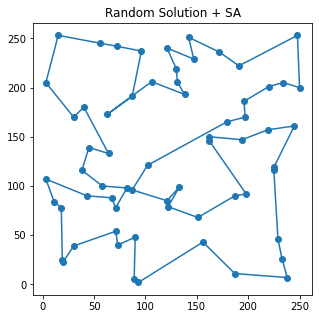

Total Distance: 1970.4194737677662


In [39]:
fig = plt.figure(figsize=(5,5))
plt.clf()
plt.title("Random Solution + SA")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total Distance:",total_distance(v))

In [40]:
v=[0]
used=[False for i in range(n)]
used[0]=True
for i in range(n-1):
    best=-1
    for j in range(n):
        if used[j]:
            continue
        if best==-1 or distance(v[i],j)<distance(v[i],best):
            best=j
    v.append(best)
    used[best]=True

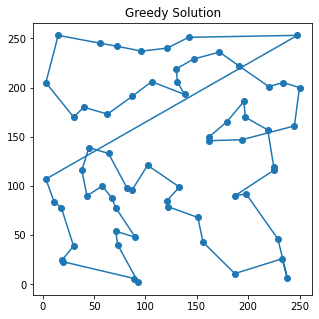

Total Distance: 2024.6160636732668


In [41]:
fig = plt.figure(figsize=(5,5))
plt.clf()
plt.title("Greedy Solution")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()
print("Total Distance:",total_distance(v))

In [42]:
start_temp=10
end_temp=0.001
total_iteration=10000000
for cnt in range(total_iteration):
    temp=start_temp+(end_temp-start_temp)*cnt/total_iteration
    if cnt%10000==0:
        print(f"cnt={cnt} temp={temp} total_distance={total_distance(v)}")
    i=random.randint(0,n-1)
    j=random.randint(0,n-1)
    if abs(i-j)<=1 or abs(i-j)>=n-1:
        continue
    dist1=distance(v[(i-1)%n],v[i])+distance(v[i],v[(i+1)%n])+distance(v[(j-1)%n],v[j])+distance(v[j],v[(j+1)%n])
    dist2=distance(v[(i-1)%n],v[j])+distance(v[j],v[(i+1)%n])+distance(v[(j-1)%n],v[i])+distance(v[i],v[(j+1)%n])
    if dist2<dist1:
        v[i],v[j]=v[j],v[i]
    else:
        prob=math.exp((dist1-dist2)/temp)
        if random.random()<prob:
            v[i],v[j]=v[j],v[i]

cnt=0 temp=10.0 total_distance=2024.6160636732668
cnt=10000 temp=9.990001 total_distance=1990.3492660837499
cnt=20000 temp=9.980002 total_distance=1941.3499315042945
cnt=30000 temp=9.970003 total_distance=1994.6580879000473
cnt=40000 temp=9.960004 total_distance=2068.185631707674
cnt=50000 temp=9.950005 total_distance=1999.8733555262475
cnt=60000 temp=9.940006 total_distance=1970.9720216552182
cnt=70000 temp=9.930007 total_distance=2019.5085234807875
cnt=80000 temp=9.920008 total_distance=1962.9870025612931
cnt=90000 temp=9.910009 total_distance=2076.496485176628
cnt=100000 temp=9.90001 total_distance=1986.9401425053559
cnt=110000 temp=9.890011 total_distance=2103.522614164702
cnt=120000 temp=9.880012 total_distance=1995.9896297507369
cnt=130000 temp=9.870013 total_distance=2046.0600239301268
cnt=140000 temp=9.860014 total_distance=2089.383258421286
cnt=150000 temp=9.850015 total_distance=2076.189803329262
cnt=160000 temp=9.840016 total_distance=2053.2287474714826
cnt=170000 temp=9.830

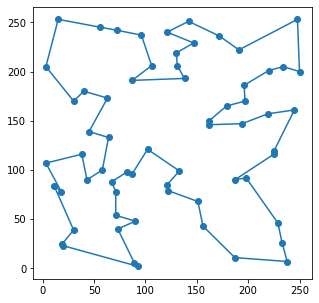

In [43]:
fig=plt.figure(figsize=(5,5))
plt.clf()
#plt.title("Simulated Annealing Solution")
plt.scatter(x,y)
plt.plot([x[v[i]] for i in range(n)]+[x[v[0]]],[y[v[i]] for i in range(n)]+[y[v[0]]])
plt.show()